# Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.



The Hypotheses

# Store Level Hypotheses:
- City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
- Population Density: Stores located in densely populated areas should have higher sales because of more demand.
- Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
- Competitors: Stores having similar establishments nearby should have less sales because of more competition.
- Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
- Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
- Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
- Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

# Product Level Hypotheses:
- Brand: Branded products should have higher sales because of higher trust in the customer.
- Packaging: Products with good packaging can attract customers and sell more.
- Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
- Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
- Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
- Advertising: Better advertising of products in the store will should higher sales in most cases.
- Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
#Read files:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Exploratory Data Analysis
As we can observe, all the column names are listed in the output.

Item_Identifier column is referenced as Unique Product ID.The remaining columns appear to be our features, with the last column being the response variable.
- Item_Weight: Represents the weight of the product in floating values.  
- Item_Fat_Content: Categorical Data which tells whether the product is low fat or not.
- Item_Visibility: The percentage of total display area all the products in a store.
- Item_Type: The Category to which the product belongs.
- Item_MRP: MRP of the products.
- Outlet_Identifier:Unique store ID.
- Outlet_Establishment_Year: Year in which the store was established.  
- Outlet_Size: Size of the Store.
- Outlet_Location_Type: Type of City the store is located. 
- Outlet_Type: Whether the store is a grocery sotre or a super market.
- Item_Outlet_Sales: The Sales of the product in a particular store.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Finding out the missing values for all the columns
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Displaying the Unique data for each column
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Evaluating the Categorical Features

In [ ]:
print('Frequency of Categories for varible Item ID')
id_counts = df['Item_Identifier'].value_counts()
id_counts.head()

Frequency of Categories for varible Item ID


FDW13    10
FDG33    10
FDO19     9
FDF56     9
NCL31     9
Name: Item_Identifier, dtype: int64

In [ ]:
print('Frequency of Categories for varible Item_Fat_Content')
df['Item_Fat_Content'].value_counts()

Frequency of Categories for varible Item_Fat_Content


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

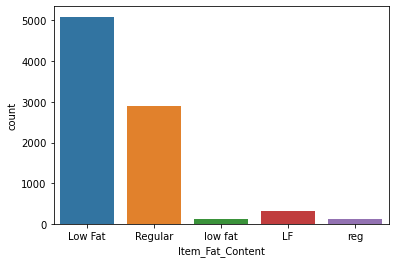

In [ ]:
sns.countplot(df.Item_Fat_Content)

In [ ]:
print('Frequency of Categories for varible Item_Type')
df['Item_Type'].value_counts()

Frequency of Categories for varible Item_Type


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

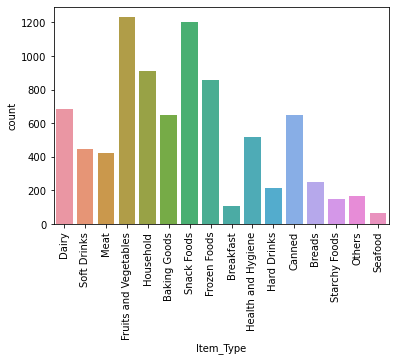

In [ ]:
sns.countplot(df.Item_Type)
plt.xticks(rotation=90)

In [ ]:
Item_Type_and_fat_counts = df.groupby(["Item_Fat_Content","Item_Type"]).size()
print(Item_Type_and_fat_counts)

Item_Fat_Content  Item_Type            
LF                Baking Goods             20
                  Breads                    8
                  Breakfast                 2
                  Canned                   17
                  Dairy                    24
                                           ..
reg               Fruits and Vegetables    25
                  Meat                      7
                  Snack Foods              23
                  Soft Drinks               1
                  Starchy Foods             7
Length: 70, dtype: int64


In [ ]:
print('Frequency of Categories for varible Outlet ID')
outlet_id_counts = df['Outlet_Identifier'].value_counts()
outlet_id_counts

Frequency of Categories for varible Outlet ID


OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
print('Frequency of Categories for varible Outlet_Location_Type')
df['Outlet_Location_Type'].value_counts()

Frequency of Categories for varible Outlet_Location_Type


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

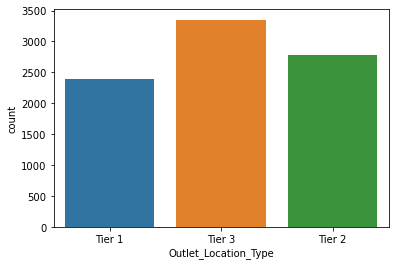

In [ ]:
sns.countplot(df.Outlet_Location_Type)

In [ ]:
print('Frequency of Categories for varible Outlet_Size')
df['Outlet_Size'].value_counts()

Frequency of Categories for varible Outlet_Size


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

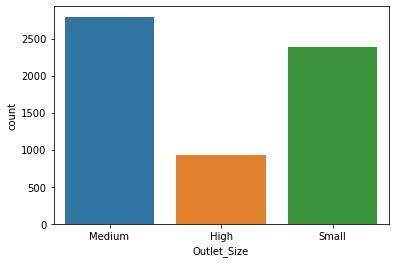

In [ ]:
sns.countplot(df.Outlet_Size)

In [ ]:
print('Frequency of Categories for varible Outlet_Type')
df['Outlet_Type'].value_counts()

Frequency of Categories for varible Outlet_Type


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

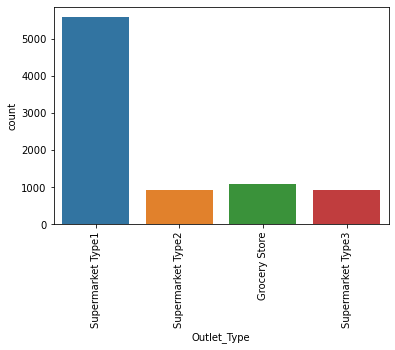

In [ ]:
sns.countplot(df.Outlet_Type)
plt.xticks(rotation=90)

In [ ]:
Outlet_Location_Type_counts = df.groupby(["Outlet_Location_Type","Outlet_Identifier","Outlet_Type"]).size()
print(Outlet_Location_Type_counts)

Outlet_Location_Type  Outlet_Identifier  Outlet_Type      
Tier 1                OUT019             Grocery Store        528
                      OUT046             Supermarket Type1    930
                      OUT049             Supermarket Type1    930
Tier 2                OUT017             Supermarket Type1    926
                      OUT035             Supermarket Type1    930
                      OUT045             Supermarket Type1    929
Tier 3                OUT010             Grocery Store        555
                      OUT013             Supermarket Type1    932
                      OUT018             Supermarket Type2    928
                      OUT027             Supermarket Type3    935
dtype: int64


In [ ]:
Outlet_Location_Type_counts = df.groupby(["Outlet_Type","Outlet_Size"]).size()
print(Outlet_Location_Type_counts)

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64


# Visualizing the Relationship between Features and Response

<AxesSubplot:xlabel='Item_Outlet_Sales'>

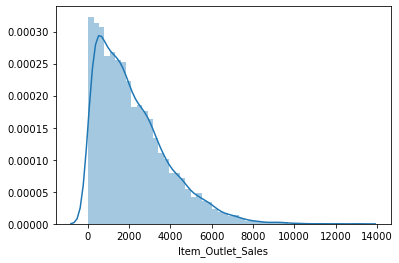

In [ ]:
sns.distplot(a = df['Item_Outlet_Sales'])

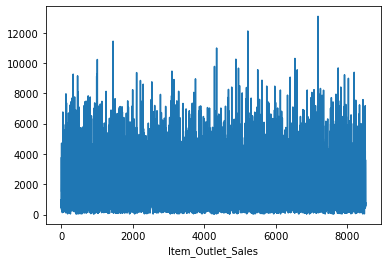

In [ ]:
#This is a line plot to show the variation of the target variable across the dataset
import seaborn as sns
sns.lineplot(data = df['Item_Outlet_Sales'])
plt.xlabel('Item_Outlet_Sales')
plt.show()

<AxesSubplot:>

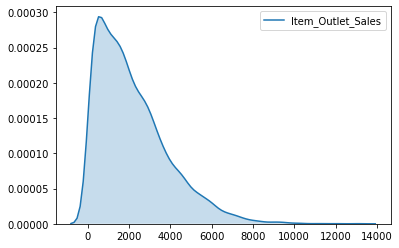

In [ ]:
sns.kdeplot(data = df['Item_Outlet_Sales'], shade = True)

In [ ]:
print ("Skew is:", df.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % df.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


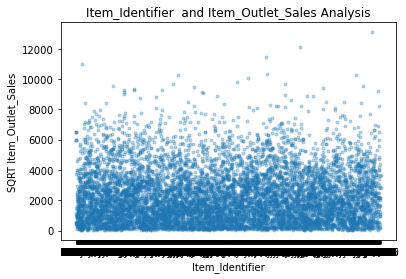

In [ ]:
plt.xlabel("Item_Identifier")
plt.ylabel("SQRT Item_Outlet_Sales")
plt.title("Item_Identifier  and Item_Outlet_Sales Analysis")
plt.plot(df.Item_Identifier , df["Item_Outlet_Sales"],'.', alpha = 0.3)

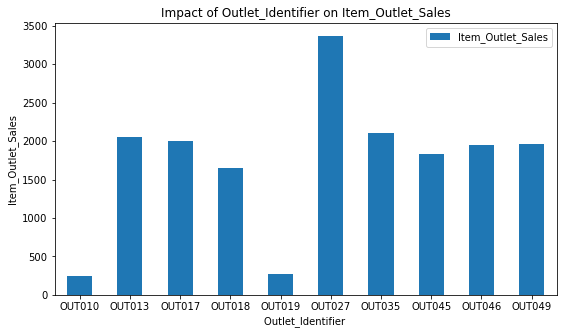

In [ ]:
Outlet_Identifier_pivot = \
df.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Identifier_pivot.plot(kind='bar',figsize=(9,5))
plt.xlabel("Outlet_Identifier ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


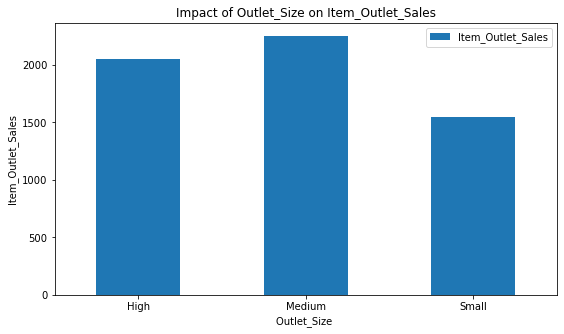

In [ ]:
Outlet_Size_pivot = \
df.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Size_pivot.plot(kind='bar',figsize=(9,5))
plt.xlabel("Outlet_Size ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

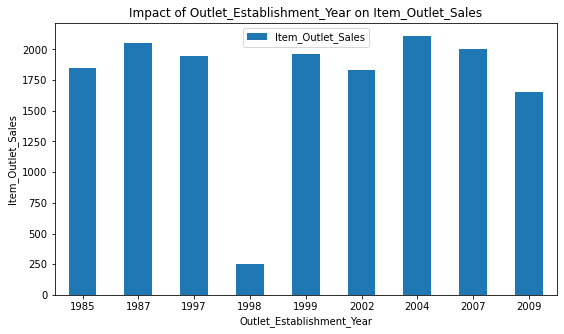

In [ ]:
Outlet_Establishment_Year_pivot = \
df.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar',figsize=(9,5))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

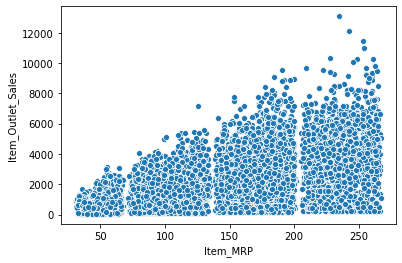

In [ ]:
#This scatter plot show the variation of Item MRP vs Item Sales using scatter plot
sns.scatterplot(x = df['Item_MRP'], y = df['Item_Outlet_Sales'])
# plt.xlabel('Item_MRP')
# plt.ylabel('Item_Outlet_Sales')
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

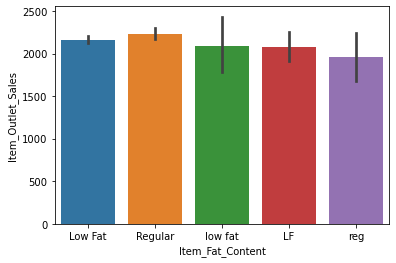

In [ ]:
#This shows the variation of Item Fat Content vs Item Sales using bar plot
sns.barplot(x = df['Item_Fat_Content'],y = df['Item_Outlet_Sales'])

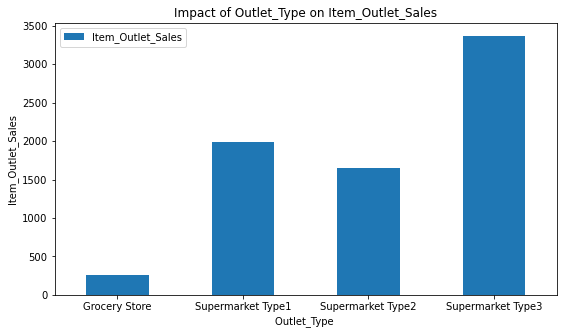

In [ ]:
Outlet_Type_pivot = \
df.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar',figsize=(9,5))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

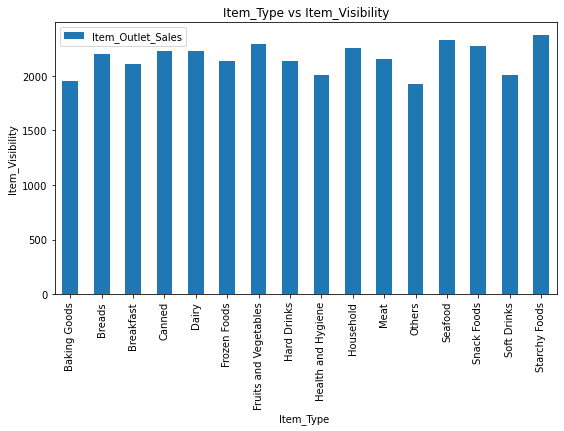

In [ ]:
pivoTable = \
df.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar',figsize=(9,5))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Visibility")
plt.title("Item_Type vs Item_Visibility")
plt.xticks(rotation=90)
plt.show()

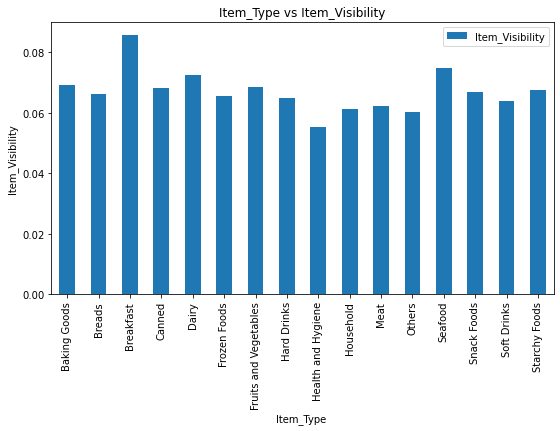

In [ ]:
pivoTable = \
df.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.mean)

pivoTable.plot(kind='bar',figsize=(9,5))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Visibility")
plt.title("Item_Type vs Item_Visibility")
plt.xticks(rotation=90)
plt.show()

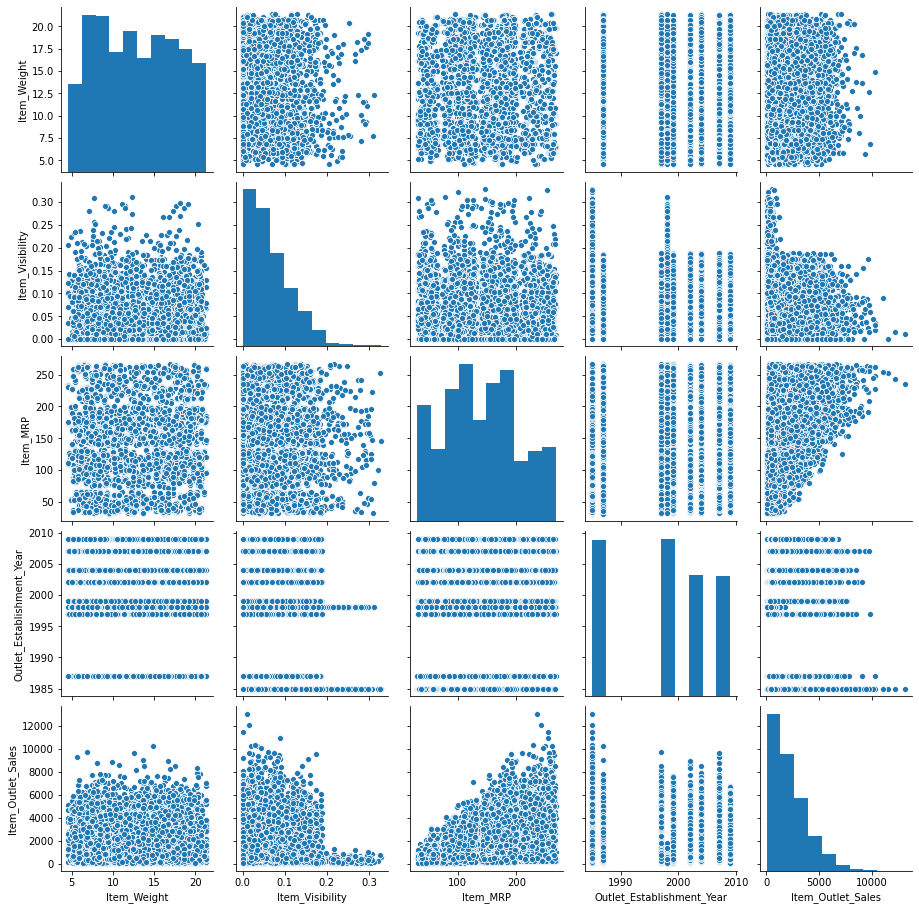

In [ ]:
sns.pairplot(data = df)